# Problema 9.1

<style type="text/css">
    ol { list-style-type: lower-alpha; }
</style>

Sea el sistema de control representado en la figura:

![prob9.1](./img/prob901.svg)

donde $G_1=\frac{1}{s+1}$ y $G_2 = \exp(-1.02 s)$.

1. Si $G_c = K_c$, determinar el _offset_ de la respuesta para una entrada en escalón unidad.
2. Para eliminar el _offset_ se recomienda que el controlador sea PID. ¿Qué valores de diseño recomendaría para los parámetros del controlador PID? Se sugiere usar el método de Ziegler-Nichols.

---

**Solución**

a) En primer lugar, encontraremos la función de transferencia del lazo de control, $G=\frac{C}{R}$, y, a continución calcularemos el _offset_.

Empezamos cargando el archivo `clase.jl` que ya carga las liberías y funciones necesarias, además también define las variables `s` y `t`:

In [4]:
include("../clase.jl");

Buscamos la función de transferencia $G$ y calculamos el _offset_:

In [7]:
# Definición de la variable Kc
@vars Kc=>"K_c" positive=true

# Definición de las funciones de transferencia del lazo
G1 = 1/(s+1)
G2 = exp(-1.02s)
Gc = Kc

# Función de transferencia del lazo de control
G = Gc*G1*G2/(1+Gc*G1*G2)

# Cambio en la consigna en forma de escalón unidad
R = 1/s

# Respuesta del lazo de control
C = G*R

# Cálculo del offset
Offset = limit(s*(R-G*R), s, 0)

   1   
───────
K_c + 1

b) Para el método de Ziegler-Nichols, en primer lugar, hay que encontrar la frecuencia de cruce. Es decir, aquella frecuencia que provoca un retraso de $-\pi$ rad. A partir de este valor, se puede encontrar la ganancia última $K_u$, que marca el límite de estabilidad, y el periodo último $P_u$ en esas condiciones.

Podemos encontrar $\omega_{co}$ a partir del digrama de Bode:

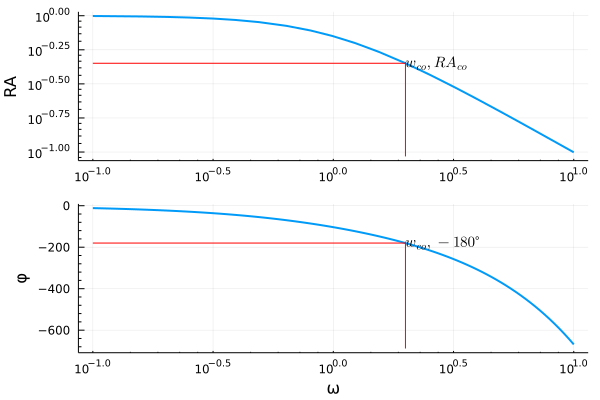

Dict{Any, Any} with 3 entries:
  "wco"   => 1.99558
  "RAco"  => 0.448006129689489
  "phico" => -3.14159

In [11]:
salida = bode(G1*G2; co=true)

Es importante destacar que en el primero de los gráficos realmente se está representando $\frac{RA}{K_c}$.

Con el valor de la frecuencia de cruce, se puede calcular el periodo último de oscilación:

$$P_u =\frac{2 \pi}{\omega_{co}}$$

In [12]:
Pu = 2*pi/salida["wco"]

3.1485565419006822

La ganancia última es el inverso de la razón de amplitudes para la frecuencia de cruce:

$$K_u = \frac{1}{RA_{co}}$$

In [13]:
Ku = 1/salida["RAco"]

2.23211231661740

Sustituyendo los valores $K_u$ y $P_u$ en las fórmulas de Ziegler y Nichols se encuentra la sintonía del controlador PID:

In [14]:
Kc = Ku/1.7

1.31300724506906

In [15]:
τI = Pu/2

1.5742782709503411

In [16]:
τD = Pu/8

0.3935695677375853